In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from deepchem import deepchem as dc
from deepchem.models import GraphConvModel

from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

In [211]:
df = pd.read_csv('ABC_smiles_data.csv')
df = df.set_index('1')

# create rdkit objects from smiles unless the column alreadt exist.
if 'molecules' not in df.columns:
    df['molecules'] = df['SMILES'].apply(Chem.MolFromSmiles)

# store name of receptors in a list
receptors = df.iloc[:, :11].columns.tolist()

In [212]:
if 'MolWt' not in df.columns:
    df['MolWt'] = df['molecules'].apply(Descriptors.MolWt)

df

,BCRP,MDR1,MRP1,MRP2,MRP3,MRP4,MRP5,MRP6,MRP7,MRP8,MRP9,SMILES,molecules,MolWt
1,,,,,,,,,,,,,,
8-HOUR BAYER; ASPIRIN,-5.3,-6.4,-5.1,-4.9,-4.1,-5.1,-9.3,-4.1,-3.5,-4.2,-6.6,CC(=O)Oc1ccccc1C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,179.151
8-MOP; METHOXSALEN,-8.0,-6.4,-4.8,-3.9,-4.7,-4.7,-3.8,-3.9,-4.7,-5.7,-3.4,COc1c2occc2cc2ccc(=O)oc12,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,216.192
A-POXIDE; CHLORDIAZEPOXIDE HYDROCHLORIDE,-10.1,-10.7,-7.9,-6.9,-7.9,-6.9,-8.5,-6.2,-4.4,-9.7,-9.5,CNC1=Nc2ccc(Cl)cc2C(c2ccccc2)=[N+]([O-])C1,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,299.761
ABACAVIR AND LAMIVUDINE; LAMIVUDINE,-7.1,-6.3,-5.9,-6.7,-5.0,-5.0,-7.4,-5.6,-5.2,-4.6,-6.7,Nc1ccn([C@H]2CS[C@H](CO)O2)c(=O)n1,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,229.261
"ABACAVIR SULFATE, LAMIVUDINE AND ZIDOVUDINE; ZIDOVUDINE",-6.8,-7.6,-5.5,-4.6,-5.3,-5.1,-6.6,-4.4,-5.0,-3.8,-5.0,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,267.245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZONTIVITY; VORAPAXAR SULFATE,-10.1,-8.6,-5.2,-5.8,-5.9,-6.9,-7.5,-3.2,-3.9,-5.8,-5.9,CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@H]1C(=O...,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,492.591
ZYDELIG; IDELALISIB,-9.3,-8.5,-6.4,-5.2,-6.1,-8.2,-7.2,-6.0,-5.4,-6.3,-6.0,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,415.432
ZYFLO CR; ZILEUTON,-7.4,-7.6,-5.7,-7.1,-6.6,-5.9,-6.3,-5.5,-5.3,-5.6,-6.7,C[C@@H](c1cc2ccccc2s1)N(O)C(N)=O,<rdkit.Chem.rdchem.Mol object at 0x000001E8DD0...,236.296


In [213]:
large_mols = df[df['MolWt'] > 800]
len(large_mols)

30

In [214]:
img = Draw.MolsToGridImage(
    large_mols['molecules'],
    molsPerRow=4,
    subImgSize=(400, 400),
    legends=[str(x) for x in large_mols['MolWt']]
)
#img

In [215]:
medium_mols = df[(df['MolWt'] > 600) & (df['MolWt'] < 800)]
len(medium_mols)

33

In [216]:
img = Draw.MolsToGridImage(
    medium_mols['molecules'],
    molsPerRow=4,
    subImgSize=(400, 400),
    legends=[str(x) for x in medium_mols['MolWt']]
)
#img

In [217]:
# Remove large mols
df = df[df['MolWt'] < 600]
len(df)

869

In [218]:
def data_for_receptor(df, receptor_name, seed=1):
    '''
    This function takes the dataframe created for all receptors and returns
    training, validation and test data that can be used in a GraphConvModel.
    '''
    
    # This code takes the initial df and republish it with data only on one receptor
    df_receptor =  df[[receptor_name, 'molecules']]
    # Applying a mask to remove possible 0 values.
    mask = df_receptor[receptor_name] == 0.0
    df_receptor = df_receptor.drop(df[mask].index)

    feat = dc.feat.ConvMolFeaturizer()
    X = feat.featurize(df_receptor['molecules'])
    y = df_receptor[receptor_name].to_numpy()
    ids = df_receptor.index

    # Create dataset for deepchem
    dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

    # Transform the output data for regression
    transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=dataset)
    dataset = transformer.transform(dataset)

    # split data
    splitter = dc.splits.RandomSplitter()
    train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset = dataset,
    frac_train = 0.8,
    frac_valid = 0.1,
    frac_test = 0.1,
    seed=seed,
    )

    return train_dataset, valid_dataset, test_dataset, transformer

In [219]:
metrics = [
    dc.metrics.Metric(dc.metrics.rms_score),
    dc.metrics.Metric(dc.metrics.mean_absolute_error),
    dc.metrics.Metric(dc.metrics.r2_score),
]

In [220]:
train_dataset, valid_dataset, test_dataset, transformer = data_for_receptor(df, 'BCRP', seed=1)
callback = dc.models.ValidationCallback(dataset=valid_dataset, interval=10, metrics=metrics, transformers=[transformer])

model = GraphConvModel(
    graph_conv_layers=[64, 64],
    batch_size=16,
    n_tasks=1,
    mode='regression',
    learning_rate=0.0001,
    dropout=0.0,
    batch_normalize=False,
)

model.fit(train_dataset, nb_epoch=30, callbacks=callback)

Step 10 validation: rms_score=2.27889 mean_absolute_error=1.7456 r2_score=0.0291174
Step 20 validation: rms_score=2.22082 mean_absolute_error=1.72339 r2_score=0.077968
Step 30 validation: rms_score=2.18748 mean_absolute_error=1.72159 r2_score=0.105443
Step 40 validation: rms_score=2.13435 mean_absolute_error=1.68203 r2_score=0.148368
Step 50 validation: rms_score=2.10692 mean_absolute_error=1.67014 r2_score=0.170115
Step 60 validation: rms_score=2.02261 mean_absolute_error=1.57832 r2_score=0.235207
Step 70 validation: rms_score=1.99205 mean_absolute_error=1.56264 r2_score=0.258142
Step 80 validation: rms_score=1.97134 mean_absolute_error=1.54983 r2_score=0.273483
Step 90 validation: rms_score=1.93395 mean_absolute_error=1.50412 r2_score=0.300784
Step 100 validation: rms_score=1.93279 mean_absolute_error=1.52167 r2_score=0.301626
Step 110 validation: rms_score=1.89207 mean_absolute_error=1.48089 r2_score=0.33074
Step 120 validation: rms_score=1.86239 mean_absolute_error=1.45066 r2_score

0.20352442264556886

In [221]:
train_preds = transformer.untransform(model.predict(train_dataset))
test_preds = transformer.untransform(model.predict(test_dataset))
train_plot_dataset = transformer.untransform(train_dataset.y)
test_plot_dataset = transformer.untransform(test_dataset.y)

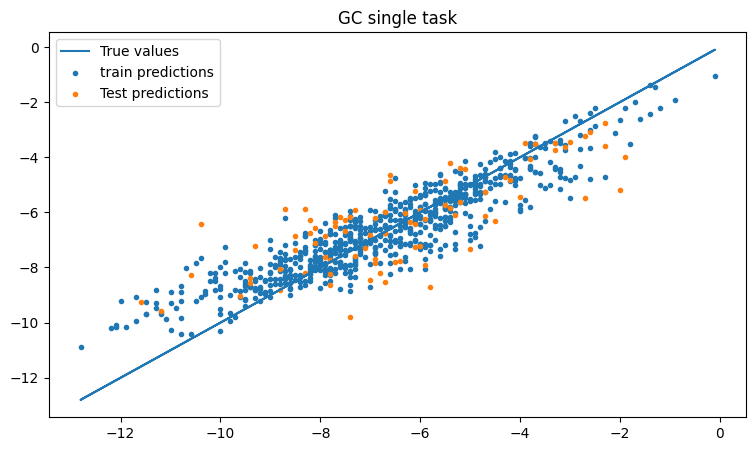

In [222]:
plt.figure(figsize=(9,5))
plt.plot(train_plot_dataset, train_plot_dataset, label='True values')
plt.scatter(train_plot_dataset, train_preds, marker='.', label='train predictions')
plt.scatter(test_plot_dataset, test_preds, marker='.', label='Test predictions')
plt.legend()
plt.title('GC single task')
plt.savefig('GCS.png')

In [223]:
test_mean = np.mean(test_preds)
test_std  = np.std(test_preds)

metric = dc.metrics.Metric(dc.metrics.rms_score)
RMSE   = model.evaluate(test_dataset, metric, transformers=[transformer]).get('rms_score')

print('Test set')
print('  Average: ', test_mean)
print('Std. dev.: ', test_std)
print('    RMSE : ', RMSE)

Test set
  Average:  -6.3414087
Std. dev.:  1.6772476
    RMSE :  1.3641719574262734


In [224]:
metric1 = dc.metrics.Metric(dc.metrics.r2_score)
model.evaluate(test_dataset, metric1, transformers=[transformer]).get('r2_score')



0.598819582044053

# MACCS

In [254]:
import torch
import random
import tensorflow as tf
from rdkit.Chem import MACCSkeys
from deepchem.models import MultitaskRegressor

def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [255]:
fingerprints = []
for mol in df['molecules']:
    fingerprint = MACCSkeys.GenMACCSKeys(mol)
    fingerprints.append(np.array(fingerprint).astype(np.float32))

In [256]:
X = fingerprints
y = df['BCRP'].to_numpy()
ids = df.index

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [257]:
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset = dataset,
    frac_train = 0.8,
    frac_valid = 0.1,
    frac_test = 0.1,
    seed=5,
)

In [258]:
n_feat = dataset.X.shape[1]
tasks = 1

In [267]:
model = dc.models.MultitaskRegressor(
    n_tasks=tasks,
    n_features=n_feat,
    layer_sizes=[100, 100, 100],
    dropouts=0.0,
    learning_rate=0.001,
    activation_fns=[torch.sigmoid]
)
callback = dc.models.ValidationCallback(dataset=valid_dataset, interval=100, metrics=metrics)
model.fit(train_dataset, nb_epoch=300, callbacks=callback)

Step 100 validation: rms_score=2.0732 mean_absolute_error=1.61402 r2_score=0.0805633
Step 200 validation: rms_score=2.0138 mean_absolute_error=1.56973 r2_score=0.13249
Step 300 validation: rms_score=1.87057 mean_absolute_error=1.46884 r2_score=0.251502
Step 400 validation: rms_score=1.68329 mean_absolute_error=1.3315 r2_score=0.39388
Step 500 validation: rms_score=1.58906 mean_absolute_error=1.26063 r2_score=0.459839
Step 600 validation: rms_score=1.54356 mean_absolute_error=1.21858 r2_score=0.490335
Step 700 validation: rms_score=1.51377 mean_absolute_error=1.20152 r2_score=0.509815
Step 800 validation: rms_score=1.49276 mean_absolute_error=1.19331 r2_score=0.523324
Step 900 validation: rms_score=1.4749 mean_absolute_error=1.18673 r2_score=0.534664
Step 1000 validation: rms_score=1.45439 mean_absolute_error=1.17675 r2_score=0.547519
Step 1100 validation: rms_score=1.43825 mean_absolute_error=1.16703 r2_score=0.557507
Step 1200 validation: rms_score=1.42303 mean_absolute_error=1.16114 

1.5484426879882813

In [268]:
train_preds = model.predict(train_dataset).flatten()
test_preds = model.predict(test_dataset).flatten()

train_plot_dataset = train_dataset.y
test_plot_dataset = test_dataset.y

Text(0.5, 1.0, 'MACCS model')

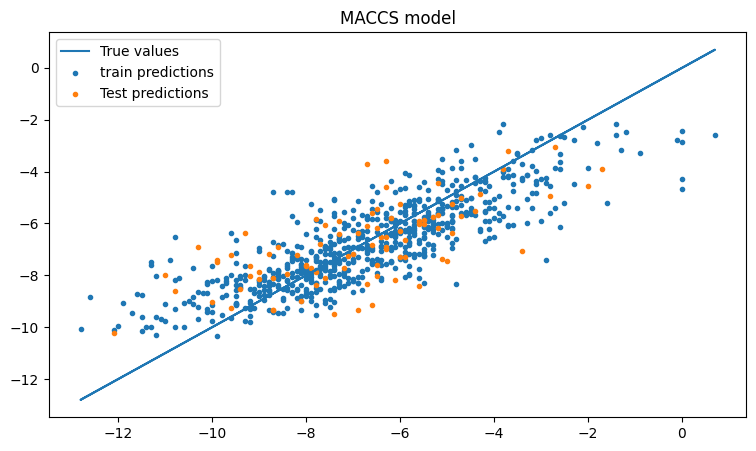

In [269]:
plt.figure(figsize=(9,5))
plt.plot(train_plot_dataset, train_plot_dataset, label='True values')
plt.scatter(train_plot_dataset, train_preds, marker='.', label='train predictions')
plt.scatter(test_plot_dataset, test_preds, marker='.', label='Test predictions')
plt.legend()
plt.title('MACCS model')

In [270]:
test_mean = np.mean(test_preds)
test_std  = np.std(test_preds)

metric = dc.metrics.Metric(dc.metrics.rms_score)
RMSE   = model.evaluate(test_dataset, metric).get('rms_score')

print('Test set')
print('Average  : ', test_mean)
print('Std. dev.: ', test_std)
print('    RMSE : ', RMSE)

Test set
Average  :  -6.810709
Std. dev.:  1.5464667
    RMSE :  1.494972002385245
